# Homework 6

## Problem 1

### (a)

Yes, if $\alpha$ is constant but sufficiently small, GD will converge to a minimizer of $f$.

### (b)

No, even if the $\alpha$ is suffiently small, SGM still has no guarantee to converge to the minimizer of $f$.

### (c)

Yes, there exists a $\alpha_k$ under certain conditions that makes SGM to converge to a minimizer of $f$.

## Problem 2

### 1

According to the given equation of hinge loss, we define the term $\left< \mathbf{w}, \mathbf{x}_i \right> + b$ in function $J(\mathbf{w}, b)$ as $t_i$, thus the given empirical risk can be rewritten as:

$$
\begin{alignat*}{2}
J(\mathbf{w}, b) &= \frac{1}{n} \sum_{i=1}^{n} (\text{max}\left\{ 0, 1 - y_i t_i \right\}) + \frac{\lambda}{2} \left\| \mathbf{w} \right\|^2 \\
&= \sum_{i=1}^{n} \frac{1}{n} (\text{max}\left\{ 0, 1 - y_i t_i \right\}) + \frac{\lambda}{2} \left\| \mathbf{w} \right\|^2 \\
&= \sum_{i=1}^{n} \left(\frac{1}{n} \text{max}\left\{ 0, 1 - y_i (\left< \mathbf{w}, \mathbf{x}_i \right> + b) \right\} + \frac{\lambda}{2n} \left\| \mathbf{w} \right\|^2 \right).
\end{alignat*}
$$

Therefore, $J_i (\mathbf{w}, b)$ can be interpreted as:
$$
J_i (\mathbf{w}, b) = \frac{1}{n} \text{max}\left\{ 0, 1 - y_i (\left< \mathbf{w}, \mathbf{x}_i \right> + b) \right\} + \frac{\lambda}{2n} \left\| \mathbf{w} \right\|^2.
$$

### 2

Firstly, we should further rewrite $J_i$ to be more readable

$$
J_i (\mathbf{w}, b) = \frac{1}{n} \text{max}\left\{ 0, 1 - y_i ( \mathbf{w}^\top \mathbf{x}_i + b) \right\} + \frac{\lambda}{2n} \left\| \mathbf{w} \right\|^2,
$$

subsequently, use $\mathbf{\theta}$ to simplifiy $J_i$

$$
\begin{alignat*}{2}
J_i (\mathbf{w}, b) &= \frac{1}{n} \text{max}\left\{ 0, 1 - y_i \mathbf{\theta}^\top \tilde{\mathbf{x}}_i \right\} + \frac{\lambda}{2n} \left\|
\begin{bmatrix}
0 & \\
  & \mathbf{I}
\end{bmatrix} \cdot \mathbf{\theta}
\right\|^2 \\
&= \frac{1}{n} \text{max}\left\{ 0, 1 - y_i \mathbf{\theta}^\top \tilde{\mathbf{x}}_i \right\} + \frac{\lambda}{2n} \mathbf{\theta}^\top
\begin{bmatrix}
0 & \\
  & \mathbf{I}
\end{bmatrix} \cdot \mathbf{\theta}
\\
\end{alignat*}
$$

where $\tilde{\mathbf{x}_i} = [1 , \mathbf{x_i}^\top]^\top$. We can define $\tilde{\mathbf{I}} = \begin{bmatrix}
0 & \\
  & \mathbf{I}
\end{bmatrix}$ for simplicity, then $J_i$ can be further rewritten as

$$
J_i = \frac{1}{n} \text{max}\left\{ 0, 1 - y_i \mathbf{\theta}^\top \tilde{\mathbf{x}}_i \right\} + \frac{\lambda}{2n} \mathbf{\theta}^\top \tilde{\mathbf{I}} \mathbf{\theta}
\\
$$

With the equation above, its gradient w.r.t. $\mathbf{\theta}$ can be given as

$$
\mathbf{u}_i = 
\begin{cases}
\frac{1}{n}(- y_i \tilde{\mathbf{x}}_i + \lambda \tilde{\mathbf{I}}\mathbf{\theta}),~\text{if } y_i \mathbf{\theta}^\top \tilde{\mathbf{x}}_i < 1 \\
\frac{\lambda}{n} \tilde{\mathbf{I}}\mathbf{\theta}, ~ \text{otherwise}
\end{cases}
$$

### 3

In [85]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [108]:
def computeSubgradient(x, y, theta, I_tilde):
  lamb = 0.001
  if y * np.dot(theta, x) < 1:
    u = -y * x + lamb * I_tilde @ theta
  else:
    u = lamb * I_tilde @ theta

  return u

def subgradientMethod(X_tilde, y, max_itera):
  # Initialize parameters
  n, dim = X_tilde.shape
  alpha = lambda x: 100 / x

  I_tilde = np.identity(X_tilde.shape[1])
  I_tilde[0, 0] = 0

  J_values = np.zeros(max_itera)

  for j in range(1, max_itera+1):
    a = alpha(j)
    theta = np.zeros(dim)
    u = np.zeros(dim)
    for i in range(0, n):
      # get new theta
      u += computeSubgradient(X_tilde[i, :], y[i], theta, I_tilde) / n

      theta -= a * u
      
    ts = X_tilde @ theta
    hinges = np.maximum(1 - ts * y, 0)
    J_values[j-1] = hinges.mean() + 0.001 / 2 * np.linalg.norm(I_tilde * theta) ** 2

  plt.plot(np.arange(max_itera), J_values)
  plt.show()
  
  plt.scatter(X_tilde[y == 1, 1], X_tilde[y == 1, 2], marker="x", edgecolors ="red", alpha = 0.4)
  plt.scatter(X_tilde[y == -1, 1], X_tilde[y == -1, 2], marker="o", facecolor = "none", edgecolors ="green", alpha = 0.3)
  
  hyerplane = lambda x: -x * theta[1] / theta[2] - theta[0] / theta[2]

  begin = hyerplane(np.min(X_tilde[:, 1]))
  end = hyerplane(np.max(X_tilde[:, 1]))

  plt.plot([np.min(X_tilde[:, 1]), np.max(X_tilde[:, 1])], [begin, end])
  plt.show()
  return J_values, theta


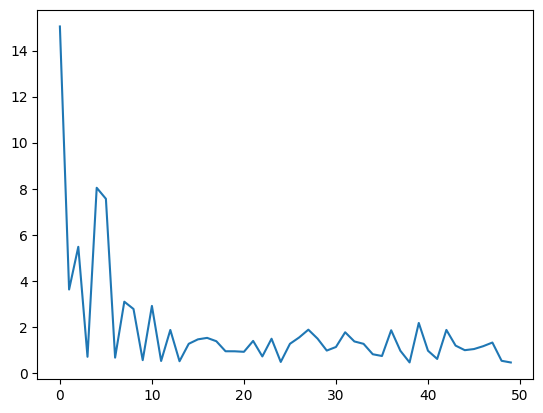

/tmp/ipykernel_412185/3807023431.py:37: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_tilde[y == 1, 1], X_tilde[y == 1, 2], marker="x", edgecolors ="red", alpha = 0.4)


(array([15.05098959,  3.6180429 ,  5.47297593,  0.69266158,  8.03958479,
         7.56029971,  0.65628558,  3.08753336,  2.77041819,  0.5459478 ,
         2.90351307,  0.51039883,  1.85894139,  0.49967506,  1.25700048,
         1.4509005 ,  1.51489118,  1.36942965,  0.933362  ,  0.93155659,
         0.90937535,  1.382746  ,  0.70848012,  1.47747331,  0.46874347,
         1.257107  ,  1.53306105,  1.87106271,  1.48229553,  0.96313542,
         1.1187471 ,  1.75878564,  1.36016706,  1.25588804,  0.80329498,
         0.72720429,  1.84625381,  0.95392217,  0.44765199,  2.16313149,
         0.95682193,  0.59924837,  1.86026521,  1.17911384,  0.97995145,
         1.02922016,  1.15336156,  1.31212879,  0.51829045,  0.44548371]),
 array([ -0.8404    , -13.25914646,  12.11200179]))

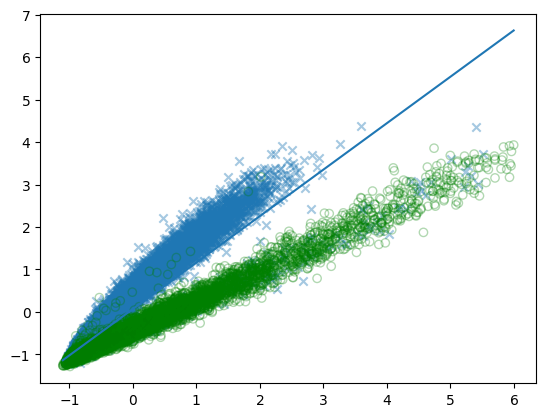

In [109]:
# Load data

X = np.loadtxt("nuclear/nuclear_x.csv", delimiter = ",")
y = np.loadtxt("nuclear/nuclear_y.csv", delimiter = ",")

SS = StandardScaler()
X = SS.fit_transform(X)

X_tilde = np.c_[np.ones(X.shape[0]), X]

subgradientMethod(X_tilde, y, 50)

### 4. 

We can basically use the same code just with a littel ajustment

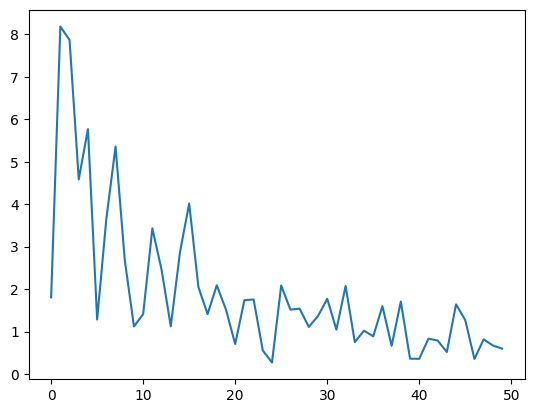

/tmp/ipykernel_412185/2533510103.py:30: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_tilde[y == 1, 1], X_tilde[y == 1, 2], marker="x", edgecolors ="red", alpha = 0.4)


(array([1.80695379, 8.18482219, 7.86653687, 4.58357075, 5.76700543,
        1.28282183, 3.65515818, 5.35835951, 2.68507015, 1.12063986,
        1.41090408, 3.43071799, 2.45758909, 1.1243902 , 2.8719302 ,
        4.01467778, 2.05178114, 1.41151557, 2.09014489, 1.51645745,
        0.70543849, 1.73817008, 1.75653186, 0.55425798, 0.2721474 ,
        2.0847918 , 1.51691152, 1.53945743, 1.10986474, 1.36557821,
        1.77296674, 1.0463696 , 2.07345631, 0.75290614, 1.02100462,
        0.88788241, 1.59775623, 0.66502329, 1.70530285, 0.36167626,
        0.35762321, 0.83259614, 0.78965724, 0.51875774, 1.64064586,
        1.26929579, 0.35556196, 0.81620346, 0.67307243, 0.59837025]),
 array([ 1.3516    , -2.06638857,  2.97003256]))

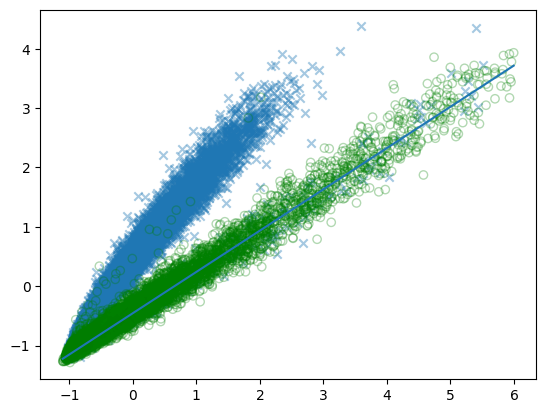

In [110]:
def stochasticSubgradientMethod(X_tilde, y, max_itera):
  # Initialize parameters
  n, dim = X_tilde.shape
  alpha = lambda x: 100 / x

  I_tilde = np.identity(X_tilde.shape[1])
  I_tilde[0, 0] = 0

  J_values = np.zeros(max_itera)

  for j in range(1, max_itera+1):
    a = alpha(j)
    theta = np.zeros(dim)
    u = np.zeros(dim)
    rand_array = np.random.permutation(n)
    for i in range(0, n):
      # get new theta
      rand_index = rand_array[i]
      u += computeSubgradient(X_tilde[rand_index, :], y[rand_index], theta, I_tilde) / n

      theta -= a * u
      
    ts = X_tilde @ theta
    hinges = np.maximum(1 - ts * y, 0)
    J_values[j-1] = hinges.mean() + 0.001 / 2 * np.linalg.norm(I_tilde * theta) ** 2

  plt.plot(np.arange(max_itera), J_values)
  plt.show()
  
  plt.scatter(X_tilde[y == 1, 1], X_tilde[y == 1, 2], marker="x", edgecolors ="red", alpha = 0.4)
  plt.scatter(X_tilde[y == -1, 1], X_tilde[y == -1, 2], marker="o", facecolor = "none", edgecolors ="green", alpha = 0.3)
  
  hyerplane = lambda x: -x * theta[1] / theta[2] - theta[0] / theta[2]

  begin = hyerplane(np.min(X_tilde[:, 1]))
  end = hyerplane(np.max(X_tilde[:, 1]))

  plt.plot([np.min(X_tilde[:, 1]), np.max(X_tilde[:, 1])], [begin, end])
  return J_values, theta

stochasticSubgradientMethod(X_tilde, y, 50)

### 5


The convergence speed of stochastic subgradient method is visibely faster than the subgradient method